In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df = pd.read_csv("Social_Network_Ads.csv")

In [6]:
df = df.iloc[:,2:]

In [12]:
df.sample(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
245,51,146000,1
27,47,30000,1
190,24,84000,0
236,40,57000,0


In [14]:
from sklearn.model_selection import train_test_split

In [16]:
X_train , X_test , y_train , y_test = train_test_split(df.drop("Purchased" , axis = 1 ) , df["Purchased"] , test_size = 0.3 , random_state = 0)
                                                       

In [19]:
X_train.shape , X_test.shape

((280, 2), (120, 2))

# standard scaler

In [26]:
from sklearn.preprocessing import StandardScaler


In [28]:
scaler = StandardScaler()

In [30]:
scaler.fit(X_train)

StandardScaler()

In [32]:
X_train_scaled = scaler.transform(X_train)

In [36]:
X_test_scaled = scaler.transform(X_test)

In [38]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [85]:
X_train_scaled.shape , y_train.shape

((120, 2), (280,))

In [42]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [44]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [48]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,120.0,120.0
mean,-0.1,-0.0
std,1.1,1.0
min,-1.9,-1.6
25%,-1.0,-0.7
50%,-0.2,-0.2
75%,0.7,0.5
max,2.2,2.3


# effect of scaling

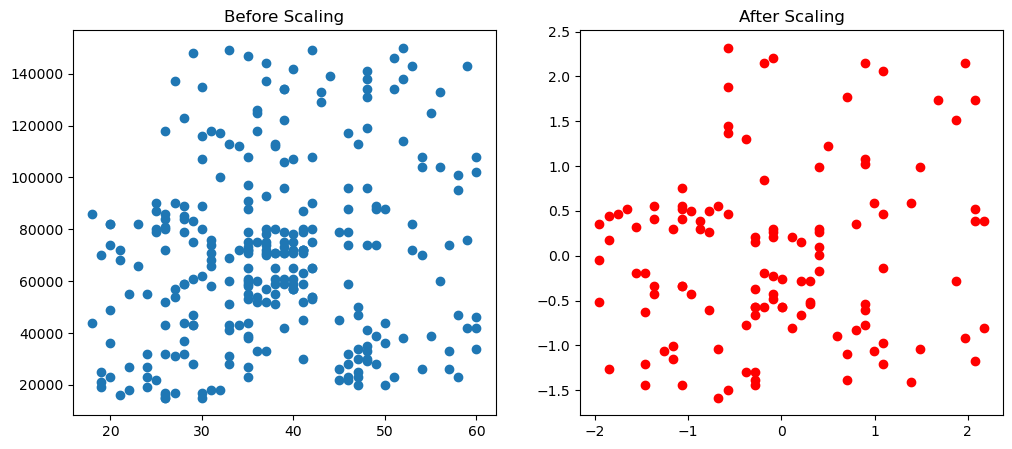

In [51]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

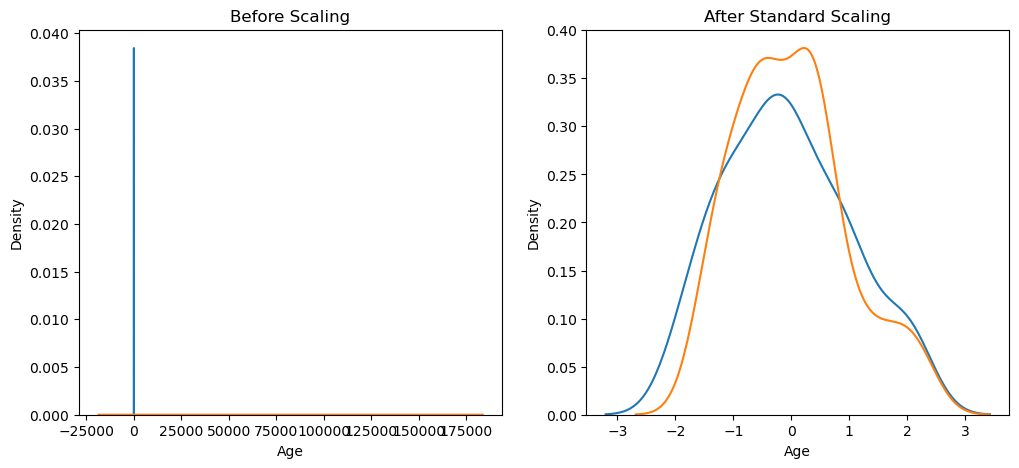

In [53]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Comparison of Distributions

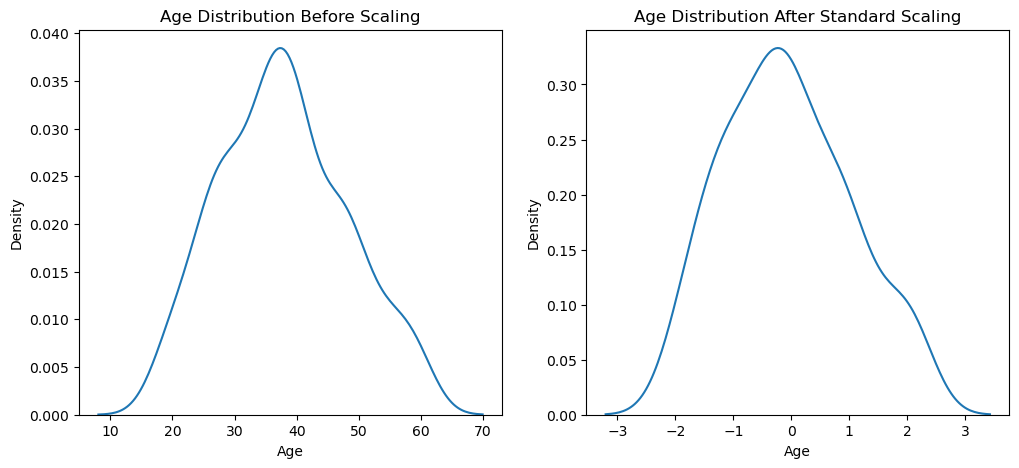

In [56]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

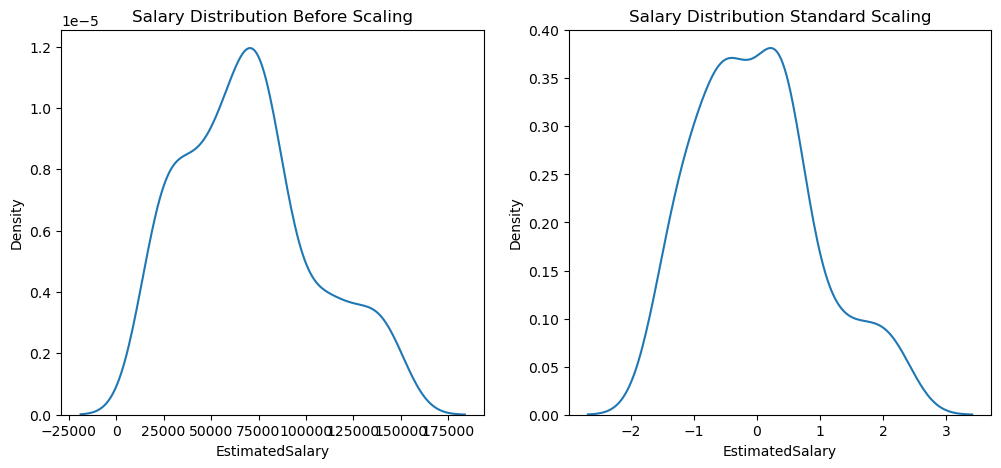

In [58]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# why scaling is important 

In [61]:
from sklearn.linear_model import LogisticRegression

In [63]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [75]:
print(X_train_scaled.shape)
print(y_train.shape)

(120, 2)
(280,)


In [91]:
y_train = y_train.ravel()  # Converts y_train to shape (n_samples,)

In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
lr_scaled.fit(X_train_scaled, y_train)
lr.fit(X_train , y_train)


LogisticRegression()

In [101]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

D:\softwerar\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [103]:
from sklearn.metrics import accuracy_score
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [107]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [115]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [117]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

D:\softwerar\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [119]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [121]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# Effect of Outlier

In [126]:
df = df.concat(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)

AttributeError: 'DataFrame' object has no attribute 'concat'

In [128]:
import pandas as pd

# Original DataFrame
df = pd.DataFrame({
    'Age': [25, 30, 35],
    'EstimatedSalary': [50000, 60000, 70000],
    'Purchased': [0, 1, 0]
})

# New data to append
new_data = pd.DataFrame({
    'Age': [5, 90, 95],
    'EstimatedSalary': [1000, 250000, 350000],
    'Purchased': [0, 1, 1]
})

# Append using pd.concat
df = pd.concat([df, new_data], ignore_index=True)

print(df)


   Age  EstimatedSalary  Purchased
0   25            50000          0
1   30            60000          1
2   35            70000          0
3    5             1000          0
4   90           250000          1
5   95           350000          1


In [130]:
df

,Age,EstimatedSalary,Purchased
0,25,50000,0
1,30,60000,1
2,35,70000,0
3,5,1000,0
4,90,250000,1
5,95,350000,1


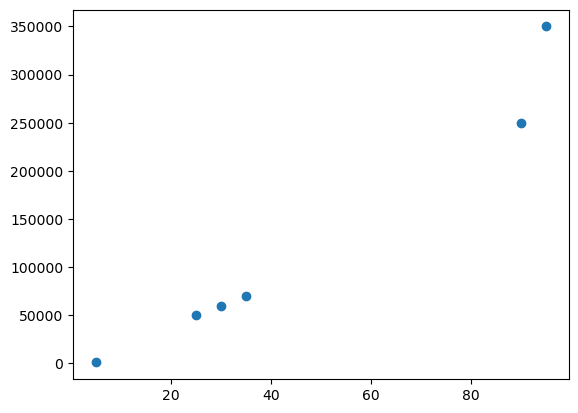

In [132]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((4, 2), (2, 2))

In [136]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [138]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

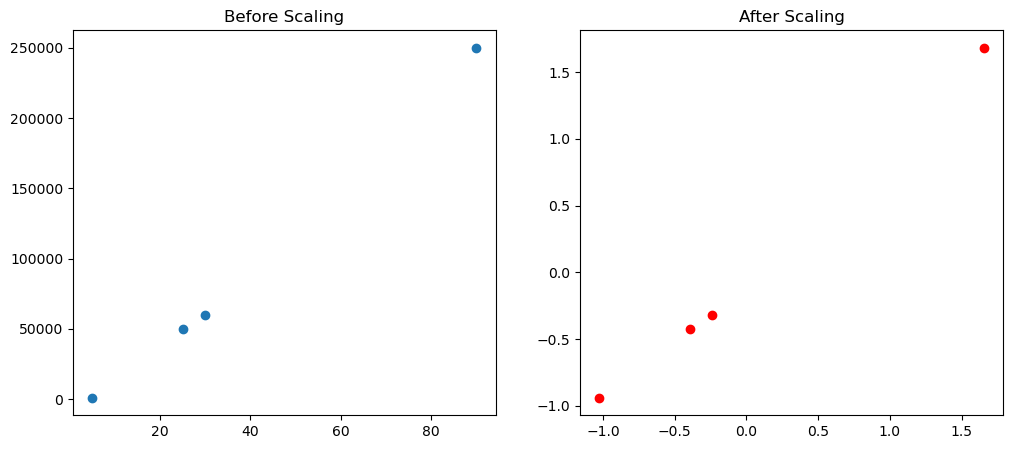

In [140]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()